<a href="https://colab.research.google.com/github/cnserge/corpus/blob/main/Clefts_BNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/sample_data/Clefts BNC.csv', delimiter='\t',  on_bad_lines='skip')


In [96]:
data.columns

Index(['nr', 'previous_turns', 'speaker_id', 'pre', 'match', 'match+1',
       'match+2', 'match+3', 'post', 'id', 'url', 'role', 'category',
       'subcategory', 'notes', 'type', 'focus', 'sentiment', 'generalization',
       'hedging', 'age_cohort', 'gender', 'name', 'age', 'occupation',
       'location'],
      dtype='object')

In [97]:
#drop values where sentiment is nan
data = data.dropna(subset=['sentiment'])
data.shape

(189, 26)

In [98]:
data["age_cohort"].value_counts()

,count
age_cohort,
Ag3,48
Ag5,34
Ag4,28
Ag2,26
X,23
Ag1,18
Ag0,12


In [99]:
# Ensure that 'x' is removed from the 'age_cohort' column
data = data[data["age_cohort"].str.strip().str.lower() != "x"]

# Verify the changes
data["age_cohort"].value_counts()

,count
age_cohort,
Ag3,48
Ag5,34
Ag4,28
Ag2,26
Ag1,18
Ag0,12


In [100]:
data["age_cohort"].value_counts().sum()

166

In [101]:
data["sentiment"].value_counts().sum()

166

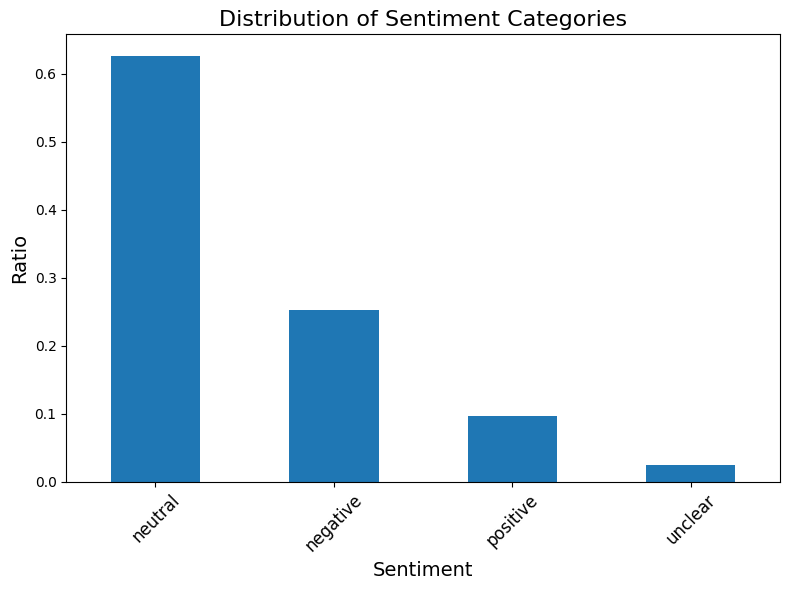

In [102]:
import matplotlib.pyplot as plt

# Analyze the distribution of the 'sentiment' column
sentiment_distribution = data['sentiment'].value_counts(normalize = True)

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar')
plt.title('Distribution of Sentiment Categories', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Ratio', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

In [103]:
data['gender_binary'] = data['gender'].map({'m': 0, 'f': 1}).fillna(-1)

# Perform One-Hot Encoding for the 'sentiment' column
sentiment_ohe = pd.get_dummies(data['sentiment'], prefix='sentiment')

# Add the one-hot encoded sentiment columns back to the dataset
data = pd.concat([data, sentiment_ohe], axis=1)

# Display the updated dataset
print(data.columns)


Index(['nr', 'previous_turns', 'speaker_id', 'pre', 'match', 'match+1',
       'match+2', 'match+3', 'post', 'id', 'url', 'role', 'category',
       'subcategory', 'notes', 'type', 'focus', 'sentiment', 'generalization',
       'hedging', 'age_cohort', 'gender', 'name', 'age', 'occupation',
       'location', 'gender_binary', 'sentiment_negative', 'sentiment_neutral',
       'sentiment_positive', 'sentiment_unclear'],
      dtype='object')


In [106]:
# Select only the specified columns
selected_columns = [
    'age_cohort', 'gender_binary', 'sentiment_negative',
    'sentiment_neutral', 'sentiment_positive', 'sentiment_unclear'
]
data_selected = data[selected_columns]



data_selected.head()

,age_cohort,gender_binary,sentiment_negative,sentiment_neutral,sentiment_positive,sentiment_unclear
29,Ag5,1,False,True,False,False
44,Ag5,1,False,True,False,False
47,Ag3,1,False,True,False,False
55,Ag2,0,False,False,True,False
75,Ag3,0,True,False,False,False


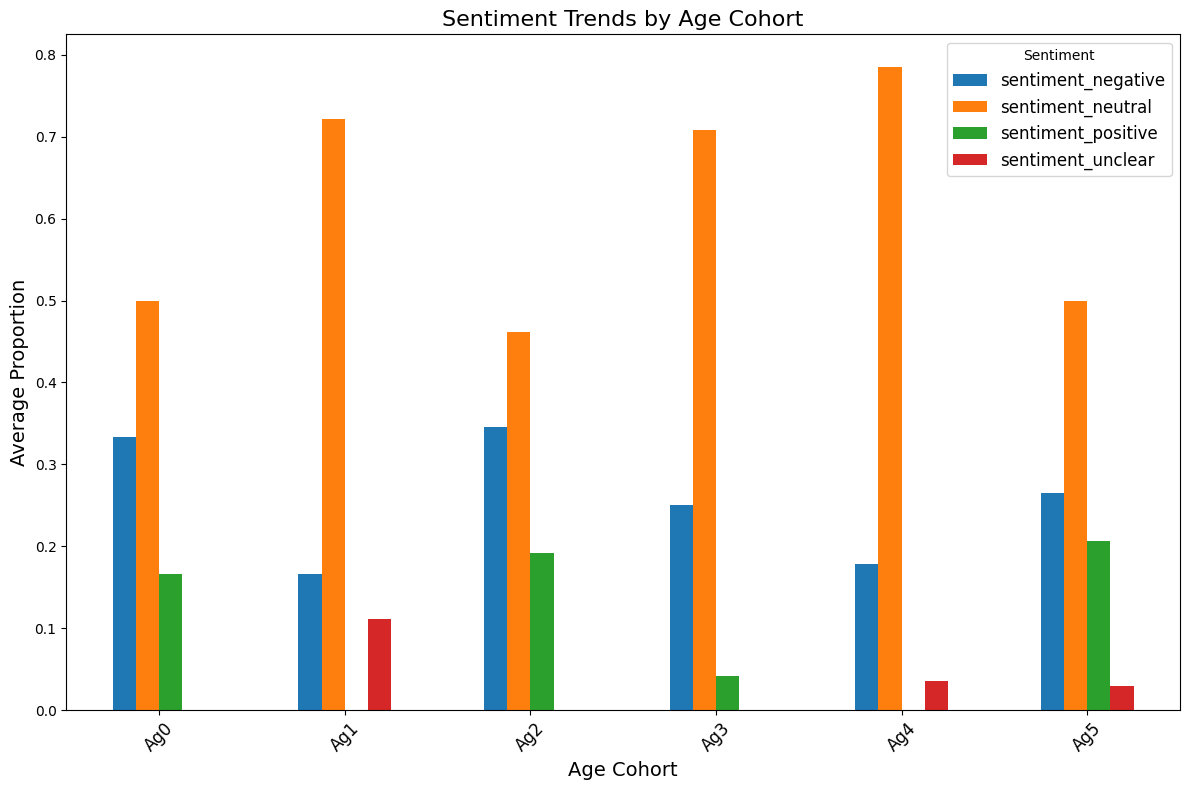

In [107]:
import matplotlib.pyplot as plt

# Calculate the mean sentiment proportions by age cohort
sentiment_trends_by_age = data_selected.groupby('age_cohort')[
    ['sentiment_negative', 'sentiment_neutral', 'sentiment_positive', 'sentiment_unclear']
].mean()

# Plot sentiment trends for each age cohort
sentiment_trends_by_age.plot(kind='bar', figsize=(12, 8))
plt.title('Sentiment Trends by Age Cohort', fontsize=16)
plt.xlabel('Age Cohort', fontsize=14)
plt.ylabel('Average Proportion', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Sentiment', fontsize=12)
plt.tight_layout()
plt.show()

Here are the important p-values (statistically significant):

Sentiment Neutral:
P-value: 0.045
Indicates a significant difference in neutral sentiment across age cohorts.
Sentiment Positive:
P-value: 0.011
Indicates a significant difference in positive sentiment across age cohorts.

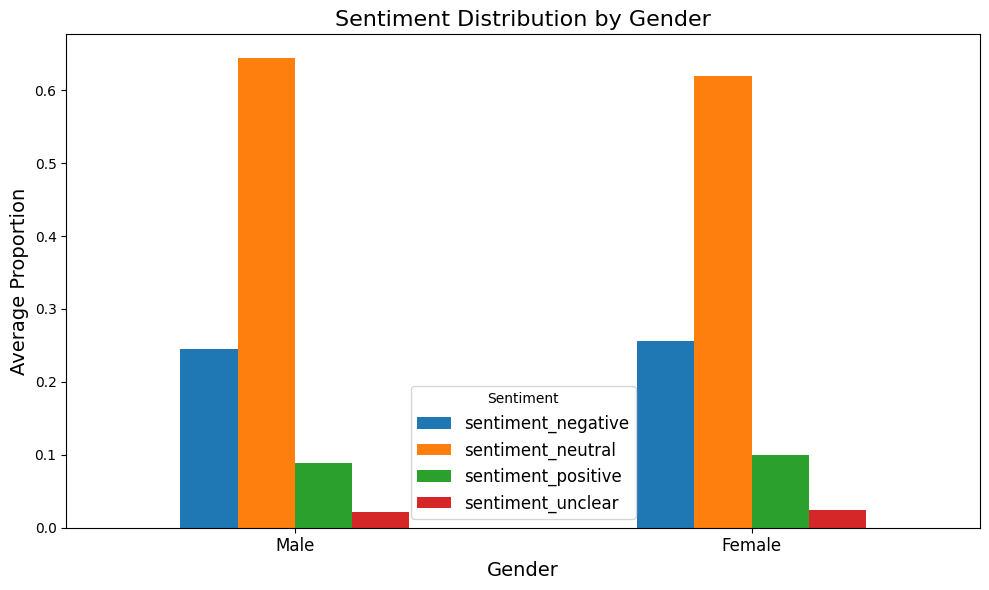

In [108]:
# Calculate the mean sentiment proportions by gender
sentiment_distribution_by_gender = data_selected.groupby('gender_binary')[
    ['sentiment_negative', 'sentiment_neutral', 'sentiment_positive', 'sentiment_unclear']
].mean()

# Rename gender_binary for better visualization
sentiment_distribution_by_gender.index = sentiment_distribution_by_gender.index.map({0: 'Male', 1: 'Female'})

# Plot sentiment distribution for each gender
sentiment_distribution_by_gender.plot(kind='bar', figsize=(10, 6))
plt.title('Sentiment Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Proportion', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Sentiment', fontsize=12)
plt.tight_layout()
plt.show()
